# Classification of water potability using machine learning algorithms

**Cristian Garcia Flores**

We are luckily fortunate enough to be in a position in which water potability is not a great issue for us and water is readily available for us to use. Unfortunately not many countries share the same fortune and don't have easily accessible potable water at their disposal. The possible impact could be both good and bad, maybe a feature is holding back a water source from being drinkable and you can do something to that feature to make it drinkable, or maybe the water is just to far from making it drinkable and their is nothing you can add or remove from it to save it. 

The dataset can be found here: https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/

The dataset contains 15 features, with each sample collected in India: 
- Stationcode: Index number of the water sample
- Locations: Where the sample was collected
- Lat: Latitude of the location where the sample was collected
- Lon: Longitude of the location where the sample was collected
- Capitalcity: Capital city where the sample was collected
- State: State where the sample was collected
- Temperature: Temperature of the water (measured in °C)
- D.O: Dissolved oxygen in the water sample
- pH: Measure of how acidic or alkaline the water is
- Conductivity: How well the water conducts electricity
- B.O.D: Biochemical oxygen demand, a measure of how much oxygen is required to break down organic waste in water
- Nitrate: Amount of nitrate found in the water sample
- Fecalcaliform: This might be a misspelling of "Fecal Coliform," which measures bacterial contamination from human or animal waste
- Totalcaliform: This might also be a misspelling of "Total Coliform," similar to the above but representing the total found in the sample
- class: Whether the water is drinkable or not

## Install dependencies and import data

Our data is in xlsx format, so we need the relavent package to load and work with our data. 

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
water_df = pd.read_excel('aquaattributes.xlsx')

In [4]:
water_df.head()

,Stationcode,Locations,Lat,Lon,Capitalcity,State,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,1001,BEAS AT U/S MANALI,32.244947,77.191080,Shimla,HIMACHAL PRADESH,9.0,9.0,8.0,85,0.1,0.2,106,397.0,yes
1,1002,BEAS AT D/S KULU,31.960582,77.114009,Shimla,HIMACHAL PRADESH,10.0,9.0,8.0,102,0.3,0.4,153,954.0,yes
2,1003,BEAS AT D/S AUT,26.887893,75.811484,Shimla,HIMACHAL PRADESH,11.0,9.0,8.0,96,0.2,0.3,58,653.0,yes
3,1004,BEAS AT U/S PANDON DAM,47.351943,19.633621,Shimla,HIMACHAL PRADESH,13.0,9.0,8.0,94,0.2,0.4,34,317.0,yes
4,1005,BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE,25.992786,91.826111,Shimla,HIMACHAL PRADESH,14.0,10.0,8.0,112,0.2,0.5,213,1072.0,yes


# Data Preprocessing and visualization

When it comes to water classification, the first six columns are not needed, as they contain geographical information on where the water was collected. So, we can drop these features.

In [5]:
water_df = water_df.drop(columns=["Stationcode", "Locations", "Lat", "Lon", "Capitalcity", "State"])
water_df.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85,0.1,0.2,106,397.0,yes
1,10.0,9.0,8.0,102,0.3,0.4,153,954.0,yes
2,11.0,9.0,8.0,96,0.2,0.3,58,653.0,yes
3,13.0,9.0,8.0,94,0.2,0.4,34,317.0,yes
4,14.0,10.0,8.0,112,0.2,0.5,213,1072.0,yes


In [6]:
print(water_df.dtypes)

Temperature      float64
D.O              float64
pH               float64
Conductivity      object
B.O.D            float64
Nitrate           object
Fecalcaliform     object
Totalcaliform    float64
class             object
dtype: object


We can see that not all features are numeric, even though they look like they are. Let's change that.

In [7]:
water_df['Nitrate'] = pd.to_numeric(water_df['Nitrate'], errors='coerce')
water_df['Fecalcaliform'] = pd.to_numeric(water_df['Fecalcaliform'], errors='coerce')
water_df['Conductivity'] = pd.to_numeric(water_df['Conductivity'], errors='coerce')

print(water_df.dtypes)

Temperature      float64
D.O              float64
pH               float64
Conductivity     float64
B.O.D            float64
Nitrate          float64
Fecalcaliform    float64
Totalcaliform    float64
class             object
dtype: object


Let's also change the class column to represent "yes" as 1 and "no" as 0, not only to make classification easier but also to make it work with visualizations.

In [8]:
water_df['class'] = water_df['class'].map({'yes': 1, 'no': 0})

In [9]:
water_df.head()

,Temperature,D.O,pH,Conductivity,B.O.D,Nitrate,Fecalcaliform,Totalcaliform,class
0,9.0,9.0,8.0,85.0,0.1,0.2,106.0,397.0,1
1,10.0,9.0,8.0,102.0,0.3,0.4,153.0,954.0,1
2,11.0,9.0,8.0,96.0,0.2,0.3,58.0,653.0,1
3,13.0,9.0,8.0,94.0,0.2,0.4,34.0,317.0,1
4,14.0,10.0,8.0,112.0,0.2,0.5,213.0,1072.0,1


Now that we have that done, let's check to see if the data is complete.

In [10]:
water_df.isna().sum()

Temperature       34
D.O                9
pH                 1
Conductivity      38
B.O.D             68
Nitrate          210
Fecalcaliform    189
Totalcaliform    135
class              0
dtype: int64

We see that we have quite a few missing values, so let's fill those in using the mean of each feature.

In [11]:
water_df = water_df.apply(lambda col: col.fillna(col.mean()) if col.name != 'class' else col)

In [12]:
water_df.isna().sum()

Temperature      0
D.O              0
pH               0
Conductivity     0
B.O.D            0
Nitrate          0
Fecalcaliform    0
Totalcaliform    0
class            0
dtype: int64

thats better

Let's create some visualizations to see the distribution of each feature based on class using box plots.

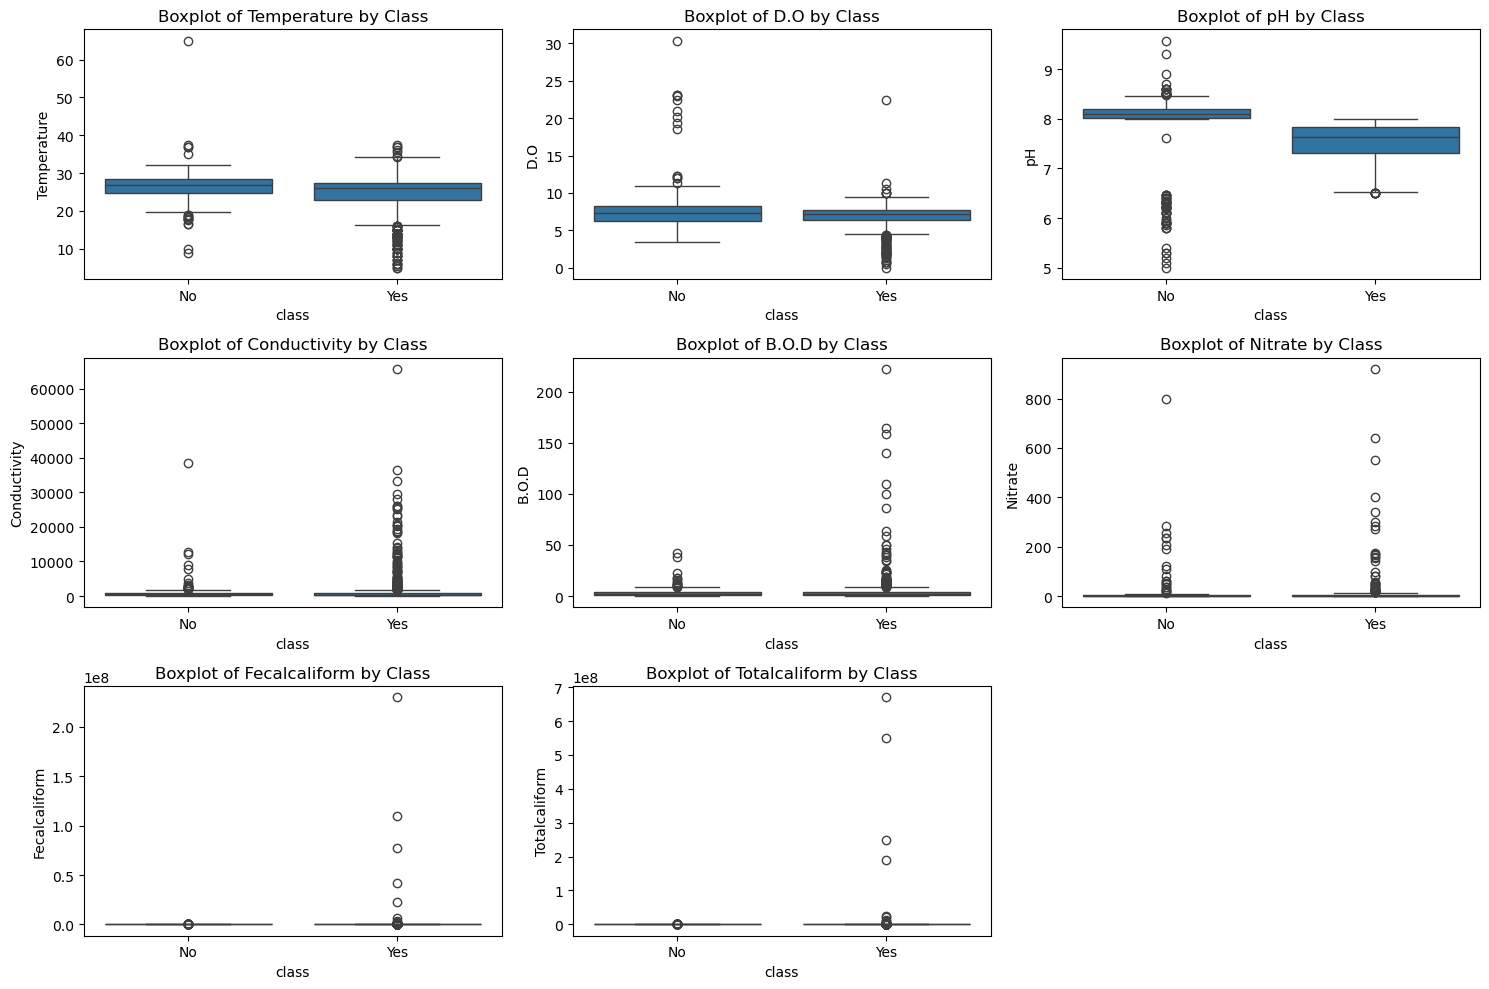

In [13]:
# Split the dataset into two based on 'class' (yes and no)
yes_class = water_df[water_df['class'] == 1]
no_class = water_df[water_df['class'] == 0]

feature_columns = ["Temperature", "D.O", "pH", "Conductivity", "B.O.D", "Nitrate", "Fecalcaliform", "Totalcaliform"]

plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='class', y=column, data=water_df)
    plt.title(f'Boxplot of {column} by Class')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    
plt.tight_layout()
plt.show()

So, we can see extreme outliers in a few of our features. For example, for conductivity, a safe range for potable water is 100-1000, so I would imagine that a conductivity of 60k+ would not be safe for drinking. A high BOD suggests pollution, so I would assume that values above ~6 would be unsafe to drink. Let's change that by removing the top outliers.

In [14]:
feature_columns = ["Conductivity", "B.O.D", "Nitrate", "Fecalcaliform", "Totalcaliform"]

water_df_cleaned = water_df.copy()

# Loop through each numerical column and remove only high outliers
for column in feature_columns:
    Q1 = water_df_cleaned[column].quantile(0.25)
    Q3 = water_df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper bound
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove only high outliers
    water_df_cleaned = water_df_cleaned[water_df_cleaned[column] <= upper_bound]

Now, let's plot the same box plots as before, but using the new dataframe with the outliers removed.

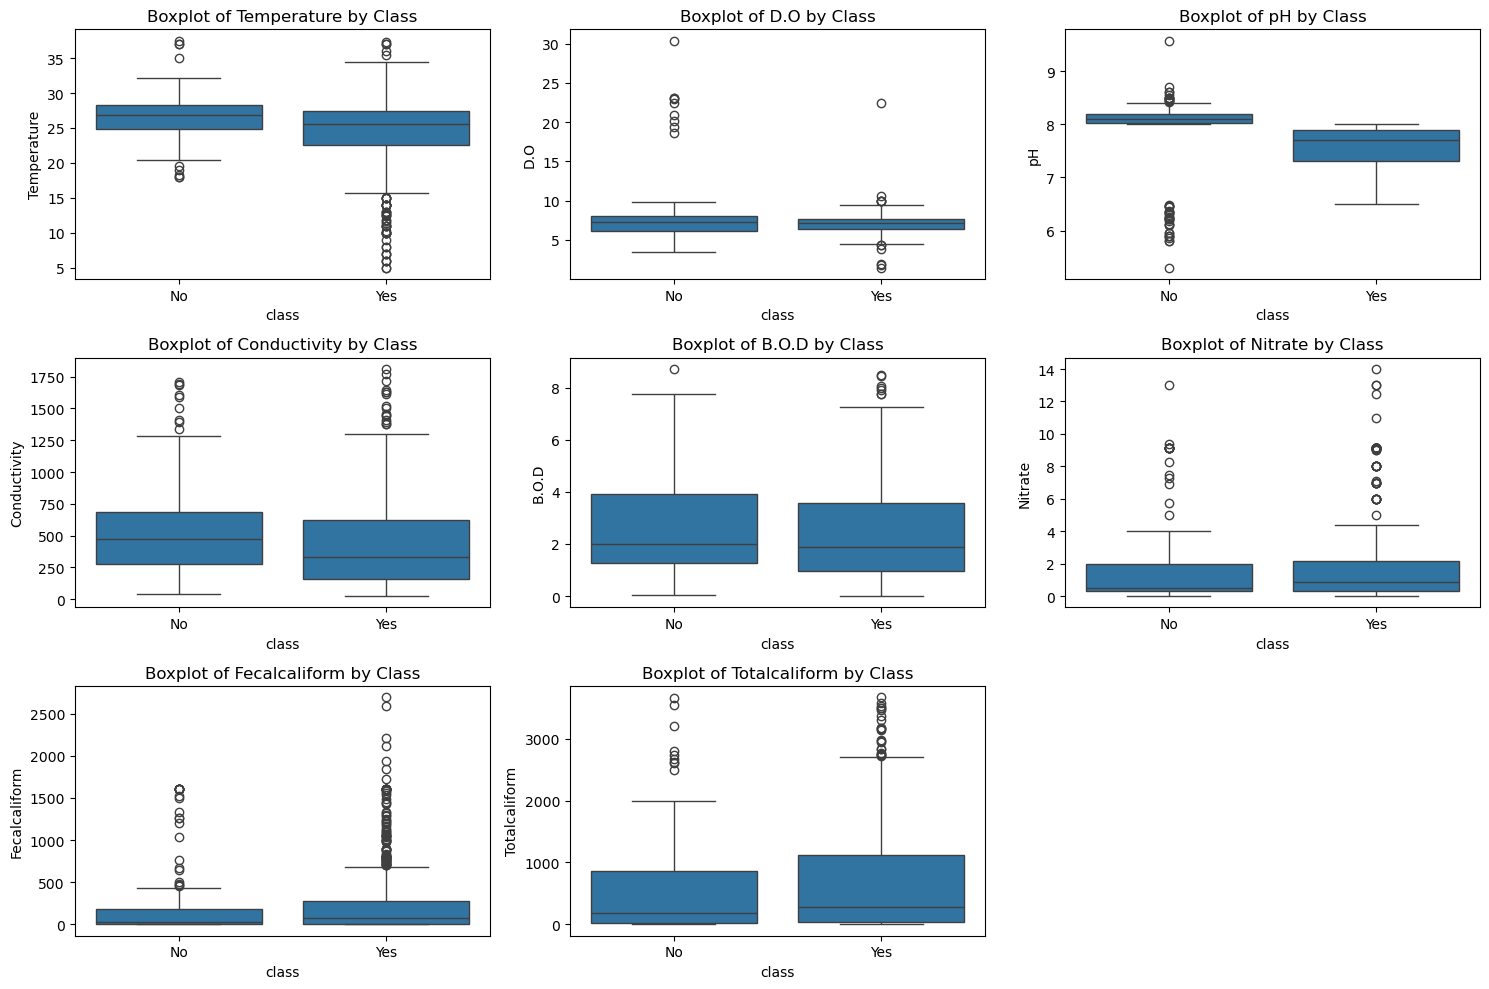

In [15]:
# Split the dataset into two based on 'class' (yes and no)
yes_class = water_df_cleaned[water_df_cleaned['class'] == 1]
no_class = water_df_cleaned[water_df_cleaned['class'] == 0]

feature_columns = ["Temperature", "D.O", "pH", "Conductivity", "B.O.D", "Nitrate", "Fecalcaliform", "Totalcaliform"]

plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='class', y=column, data=water_df_cleaned)
    plt.title(f'Boxplot of {column} by Class')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    
plt.tight_layout()
plt.show()

One of the major changes we can see is that, for some features, the box plots were not visible before. However, with the removal of outliers, we can now see the plots for those features and determine where the ranges lie.

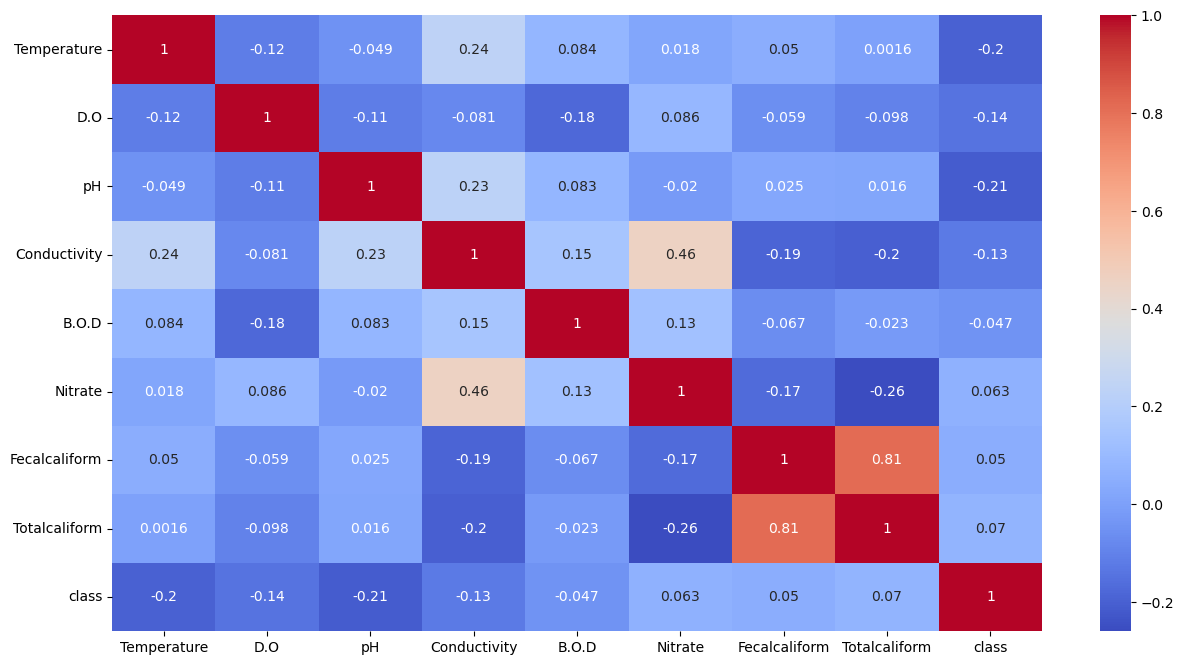

In [73]:
plt.figure(figsize =(15,8))
sns.heatmap(water_df_cleaned.corr(),annot =True,cmap = 'coolwarm')
plt.show()

# Modeling 

For this project I plan to use a few classifiers and comparing their results.
The models I want to use: 
- Decision Tree Classifier
- Random Forest
- KNN
- SVM


In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

### Train Test Split our data

In [19]:
X = water_df_cleaned.drop('class', axis=1)
y = water_df_cleaned['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree Classifier

In [20]:
t_clf = tree.DecisionTreeClassifier()

t_clf.fit(X_train, y_train)
y_hat_dt = t_clf.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_hat_dt)}")

Accuracy score: 1.0


We can see that we get 100% accuracy, which seems very weird. Since we have multiple features, let's see what the tree is basing its classification on.

<Figure size 1000x600 with 0 Axes>

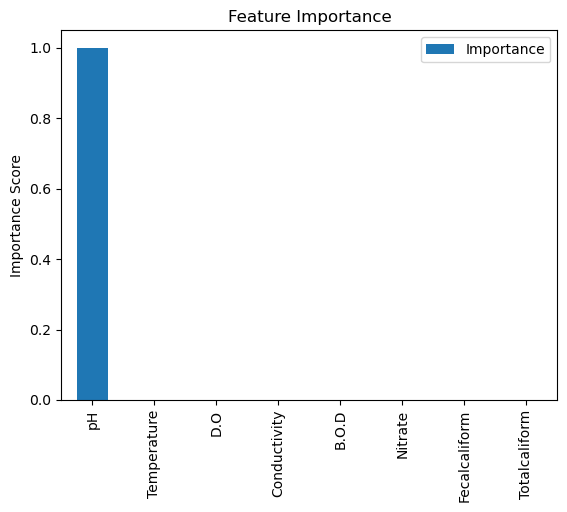

In [21]:
feature_importances = t_clf.feature_importances_

feat_importances = pd.DataFrame(
    {'Importance': feature_importances},
    index=feature_columns
)

feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()

We can see that the decision tree classifier identifies pH as the most important feature, while all other features do not matter. It classifies all samples as either potable or not based solely on how high or low their pH readings are.

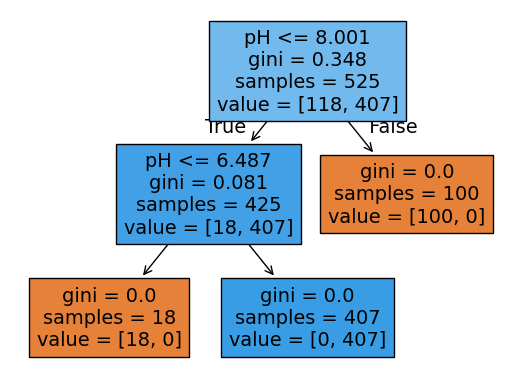

In [22]:
tree.plot_tree(t_clf, feature_names = X.columns, filled=True)
plt.show()

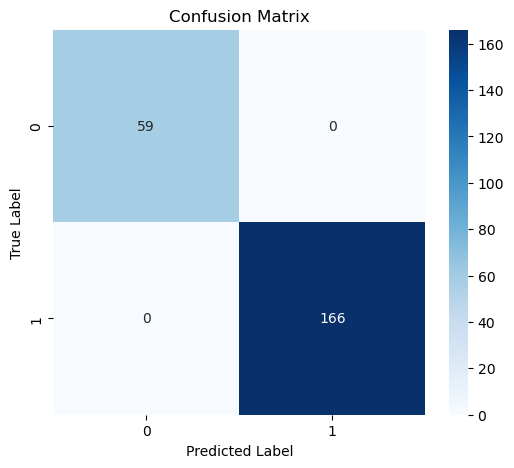

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       166

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



In [23]:
cm = confusion_matrix(y_test, y_hat_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_hat_dt))

## Random Forest Classifier

In [33]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)
y_hat_rf = rf_clf.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_hat_rf)}")

Accuracy score: 0.9911111111111112


<Figure size 1000x600 with 0 Axes>

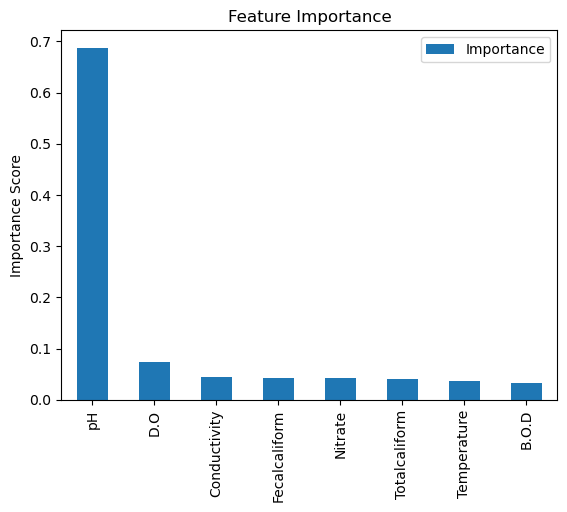

In [34]:
feature_importances = rf_clf.feature_importances_

feat_importances = pd.DataFrame(
    {'Importance': feature_importances},
    index=feature_columns
)

feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()

With the added complexity of the random forest, we can see that accuracy drops. However, this is not necessarily a bad thing, as I would find it suspicious if another model achieved 100% accuracy. We see that pH is still the most important feature, but now other features are also being considered. This contrasts with the decision tree classifier, which only considered pH as the sole relevant feature.

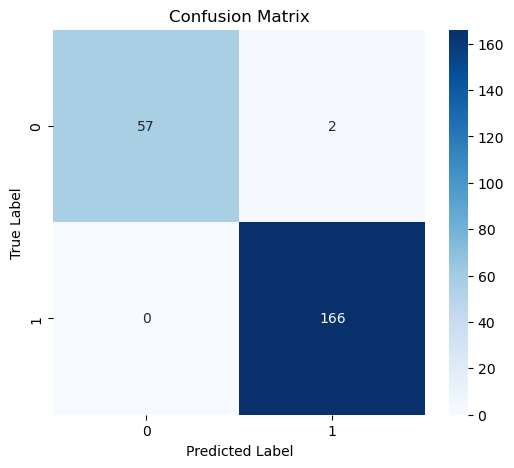

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.99      1.00      0.99       166

    accuracy                           0.99       225
   macro avg       0.99      0.98      0.99       225
weighted avg       0.99      0.99      0.99       225



In [26]:
cm = confusion_matrix(y_test, y_hat_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_hat_rf))

## SVM Classifier

In [56]:
svm_clf = svm.SVC(kernel='rbf', C=4, gamma='scale', class_weight='balanced', random_state=42)

svm_clf.fit(X_train, y_train)
y_hat_svm = svm_clf.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_hat_svm)}")

Accuracy score: 0.5466666666666666


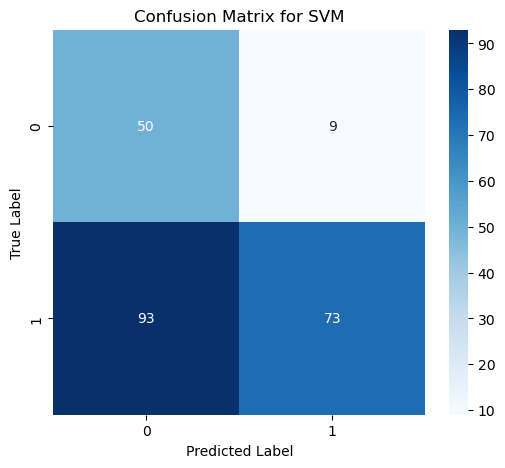

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.85      0.50        59
           1       0.89      0.44      0.59       166

    accuracy                           0.55       225
   macro avg       0.62      0.64      0.54       225
weighted avg       0.75      0.55      0.56       225



In [57]:
cm = confusion_matrix(y_test, y_hat_svm)

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_hat_svm))

We can see that for our SVM classifier, we get approximately 55% accuracy. From the confusion matrix, we observe that the model correctly predicts most of the '0' (No) class. However, it struggles with classifying the '1' (Yes) class, mislabeling more than half of them as 'No'. This could be due to an imbalance in the dataset, as the 'Yes' class has more representation than the 'No' class.

## KNN Classifier

In [71]:
knn_clf = KNeighborsClassifier(n_neighbors=9)

knn_clf.fit(X_train, y_train)
y_hat_knn = knn_clf.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_hat_knn)}")

Accuracy score: 0.7333333333333333


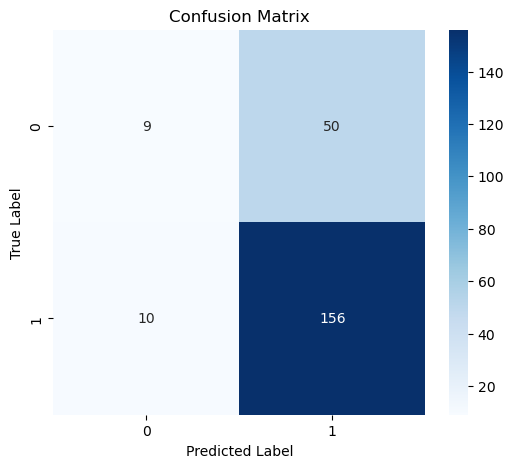

              precision    recall  f1-score   support

           0       0.47      0.15      0.23        59
           1       0.76      0.94      0.84       166

    accuracy                           0.73       225
   macro avg       0.62      0.55      0.53       225
weighted avg       0.68      0.73      0.68       225



In [72]:
cm = confusion_matrix(y_test, y_hat_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_hat_knn))

From the confusion matrix, we can see that most of the "Yes" class (1) was predicted accurately. However, the model also incorrectly classified many of the "No" class (0) as Yes. This could be due to the low representation of the "No" class, leading to an imbalance in the dataset.

As the k-value of our KNN model increases, the model relies more on the majority class for classification. This means that if the "Yes" class is overrepresented, the model is more likely to misclassify "No" samples as Yes, reducing overall accuracy.

## Impact

Water is considered by most to be one of the most important human necessities, as it is something we cannot live without for an extended period. Even so, not all water around the world is potable and ready for human consumption. Not everyone has access to a nearby clean source of water, and for many, even when they do, it must be rationed.

In many countries, like the U.S., water potability is the least of our concerns, as clean drinking water is widely available. However, other countries do not have it as easy. For example, in India (where this dataset is from), major cities may have piped water systems, but in more rural areas, people often rely on environmental water sources. Due to high pollution and scarcity, this water may not always be safe for consumption.

By leveraging machine learning, we can analyze key factors that determine water potability and automate the process of assessing whether water in a certain region is safe to drink. However, choosing the right model is the highest priority.

From testing, I found that:

- Decision Trees were too simplistic, as they only relied on pH levels, ignoring other crucial factors that impact potability. This left room for error as no other feature was being considered. 
- Random Forest performed better, as it took multiple features into account, though it still had some errors.
- SVM's performed poorly, likely due to an imbalance in the dataset—the "Yes" class was overrepresented compared to the "No" class. A more balanced dataset could help us reassess the model's effectiveness.
- KNN faced similar issues. The lack of an even class distribution led to many false positives, particularly because the "No" class had fewer samples.

A project like this could greatly benefit many people, but there are risks involved. Machine learning models are not always 100% accurate—they can flag false positives and false negatives, which can be dangerous, especially in a field where human health is at stake. It is not as simple as taking one reading and determining water potability for the foreseeable future.

Continuous data collection is crucial, especially in uncontrolled environments where water quality can fluctuate. Implementing constant monitoring systems and ensuring that decisions are always backed by secondary human testing would make these models more reliable and effective in real-world applications.

Resources: 
- For removing the outliers: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
- Changing yes/no to 1/0: https://www.includehelp.com/python/change-a-column-of-yes-or-no-to-1-or-0-in-a-pandas-dataframe.aspx
- KNN parameters: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- SVM parameters: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Opening xlsx files: https://www.geeksforgeeks.org/reading-excel-file-using-python/
- Dataset: https://www.hydroshare.org/resource/4ab43e1b507b496b9b42749701daed5c/